# Lesson 1.6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# generating an array of x values
x = np.arange(0,10,1) # range(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x_list = list(range(10))
x_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
for i in range(len(x_list)):
    x_list[i] = x_list[i]*1 

In [6]:
x_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
2 * x_list 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
2 * x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

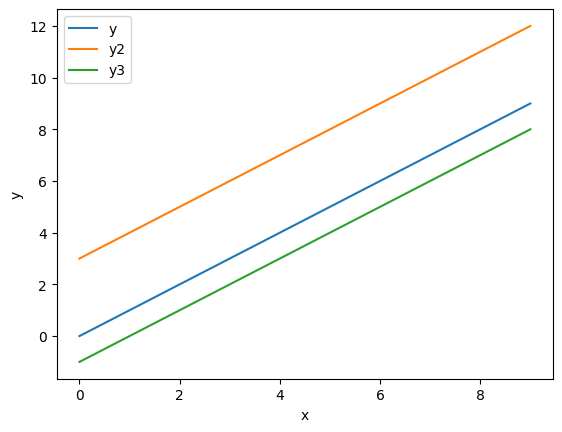

In [14]:
y  =  0 + 1 * x # b_0 = 0,  b_1 = 1
y2 =  3 + 1 * x # b_0 = 3,  b_1 = 1
y3 = -1 + 1 * x # b_0 = -1, b_1 = 1
#here we are changing the y-intercept, which controls the height of the line
#
fig, ax = plt.subplots()  
ax.plot(x,y, label = 'y')
ax.plot(x,y2, label = 'y2')
ax.plot(x,y3, label = 'y3')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend() # Adds a legend
plt.show()

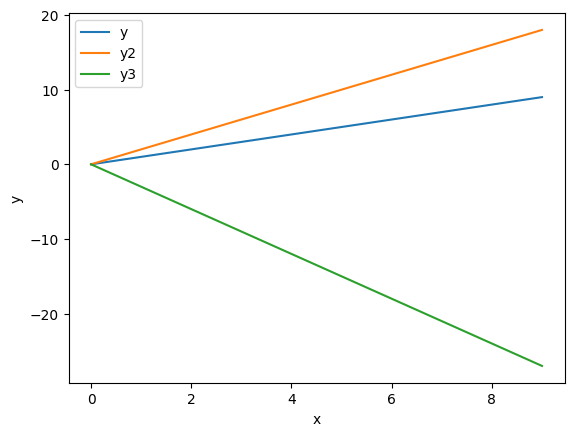

In [15]:
# y = b0 + b1 * x
y  =  0 + 1 * x # b_0 = 0, b_1 = 1
y2 =  0 + 2 * x # b_0 = 0, b_1 = 2
y3 =  0 - 3 * x # b_0 = 0, b_1 = -3
#here we are changing the gradient (aka coefficient), which controls the slope of the line

fig, ax = plt.subplots()  
ax.plot(x,y, label = 'y')
ax.plot(x,y2, label = 'y2')
ax.plot(x,y3, label = 'y3')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()

In [16]:
#The whole goal of Linear Regression is to find the "best" intercept and slope to "fit" our data!

In [17]:
# apply linear regression on the following data

In [18]:
reg_data = pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT1/DAY4/1.06 Linear Regression Intro/regression_data.csv')
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


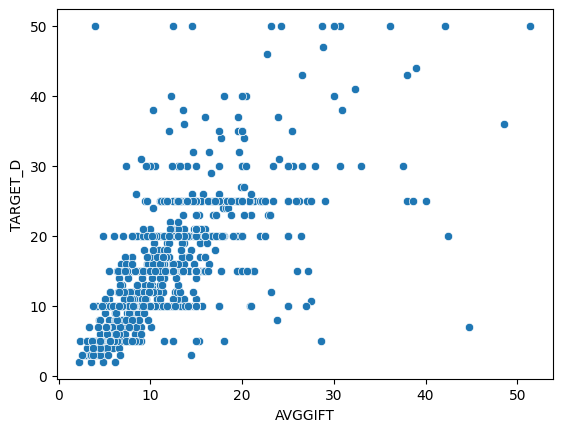

In [19]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [21]:
y = reg_data['TARGET_D']
X = reg_data[['AVGGIFT']]

In [22]:
type(y)

pandas.core.series.Series

In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

# Option 1
# from sklearn import linear_model
# lm = linear_model.LinearRegression()

# Option 2
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# from sklearn.metrics import mean_squared_error

#lm = linear_model.LinearRegression()
lm = LinearRegression()

In [32]:
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

# lm = LinearRegression().fit(X,y)
lm.fit(X,y) # X is the column that we want to use to make predictions. y is the column that we want to predict
print(lm.intercept_) # b_0
print(lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

3.6731826984235827
[0.95595086]


$$ TARGET_D = 3.67 + 0.96 * AVGGIFT$$

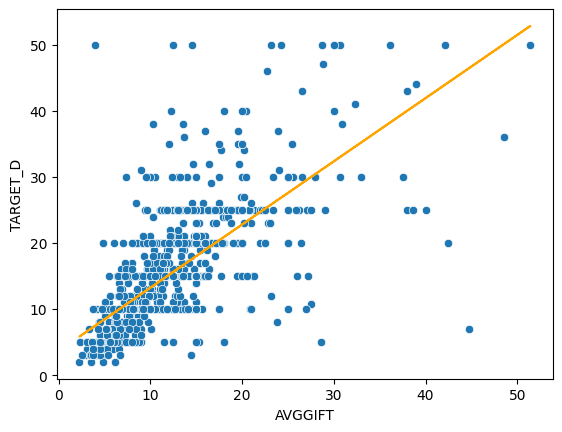

In [33]:
#let's visualize this result
# In case of having two independent columns
# lm.intercept_ + lm.coef_[0] * reg_data[col1] + lm.coef_[1] * reg_data[col2]
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT'] # b_0 + b_1 * x
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

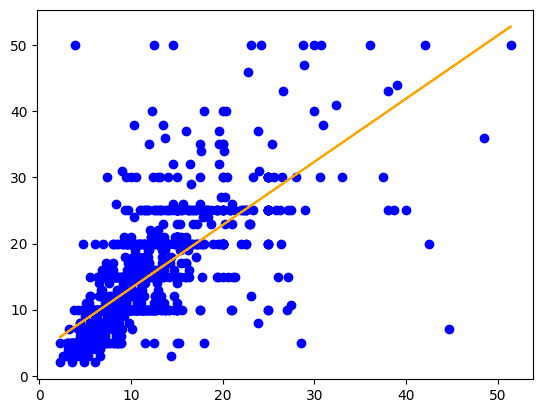

In [34]:
#let's visualize this result only with matplotlib
# In case of having two independent columns
# lm.intercept_ + lm.coef_[0] * reg_data[col1] + lm.coef_[1] * reg_data[col2]
regression_line = lm.intercept_ + lm.coef_[0] * reg_data['AVGGIFT'] # b_0 + b_1 * x
plt.plot(reg_data['AVGGIFT'],regression_line, c = 'orange')
plt.scatter(reg_data['AVGGIFT'],reg_data['TARGET_D'], c = 'blue')
plt.show()

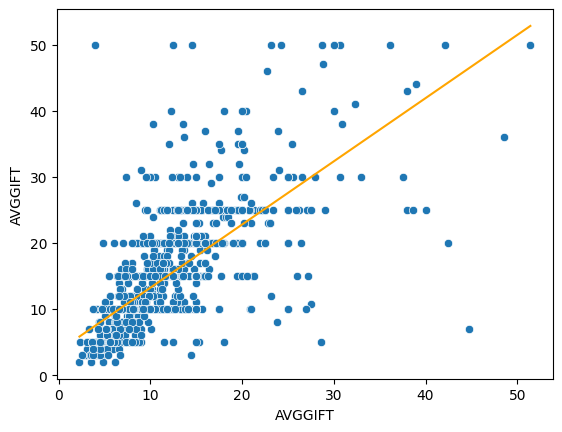

In [35]:
#let's visualize this result only with seaborn
# In case of having two independent columns
# lm.intercept_ + lm.coef_[0] * reg_data[col1] + lm.coef_[1] * reg_data[col2]
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT'] # b_0 + b_1 * x
sns.lineplot(x=reg_data['AVGGIFT'],y=regression_line, color = 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data) # X = reg_data[['AVGGIFT','IC1']] 
#sns.scatterplot(x=reg_data['AVGGIFT'],y=reg_data['TARGET_D'])
plt.show()

In [38]:
np.array([[1,2,3],[4,5,6]])#.reshape(3,2)

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.array([[1,2,3],[4,5,6]]).reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [39]:
#we can use this model to predict new or unseen datapoints
lm.predict([[10],[20],[30],[50]])
#lm.predict(np.array([10,20,30,50]).reshape(-1, 1))
#what does this mean

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.23269127, 22.79219984, 32.3517084 , 51.47072554])

In [40]:
X

,AVGGIFT
0,13.511111
1,12.222222
2,23.857143
3,10.400000
4,8.222222
...,...
995,11.333333
996,15.000000
997,8.142857
998,3.687500


In [41]:
lm.predict(X) # lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']; 

array([16.58914094, 15.3570265 , 26.47943886, 13.61507161, 11.53322308,
       11.63943984,  7.1673479 , 22.79219984, 10.63796751,  8.70785721,
       13.23269127, 13.90185687,  8.36189404, 20.01125189, 16.33953155,
        7.82662435,  9.9187283 , 18.01244555,  7.97496155,  7.03671349,
       13.36015138, 19.37808963, 18.01244555,  9.5151046 , 14.10897956,
        8.3573419 ,  7.74368312,  8.06300966, 15.00802858, 12.20845821,
       13.75411901, 10.77453192, 13.05888202, 12.75471584, 11.23388493,
       15.62256841, 10.84281412, 13.9762086 , 12.36364503, 14.66661755,
       15.81375858,  7.66568334, 10.55602887, 16.41919412,  9.27232343,
        7.70941965, 11.89436007, 15.78189356, 23.62865684,  8.6919247 ,
       11.22016315,  6.79041375, 10.15993271, 16.63162765, 13.55134155,
       10.27793407, 14.44356236,  8.27590905,  9.68201666, 24.00651579,
        8.53984161,  7.09254538,  7.56368037, 14.42762984, 16.91993029,
       10.48433255,  9.27232343, 13.23269127, 12.64441382, 20.72

In [42]:
data2 = reg_data[['TARGET_D']].copy()
data2.columns = ["y_real"]
data2['y_pred'] = lm.predict(X)
data2['error'] = data2['y_real'] - data2['y_pred']
data2

,y_real,y_pred,error
0,38.0,16.589141,21.410859
1,10.0,15.357027,-5.357027
2,37.0,26.479439,10.520561
3,12.0,13.615072,-1.615072
4,15.0,11.533223,3.466777
...,...,...,...
995,17.0,14.507292,2.492708
996,23.0,18.012446,4.987554
997,10.0,11.457354,-1.457354
998,4.0,7.198251,-3.198251


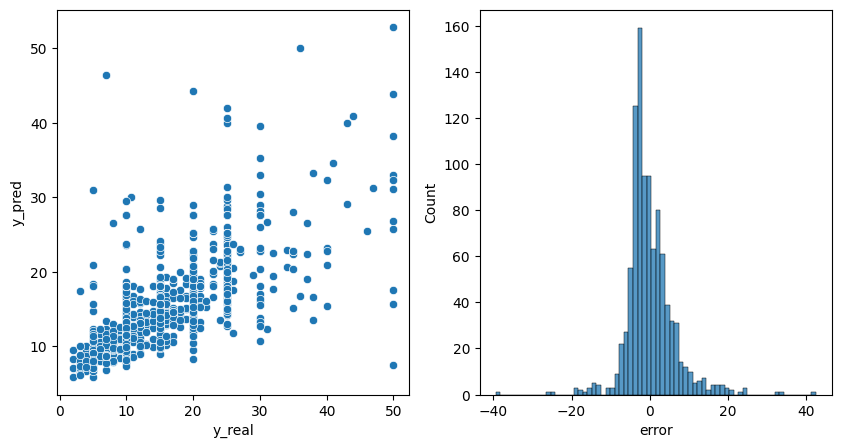

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data = data2, y = "y_pred", x = "y_real", ax = ax[0])
sns.histplot(data2["error"], ax = ax[1])
plt.show()

In [44]:
#the score is not great, but we have not performed any data preparation yet
print(lm.score(X,y)) # .score(X,y) asks the model to predict the "y" for the given X. Ideally it should be as close possible to 1
# and then compares the predicted "y_pred" against the real "y". 

y_pred = lm.predict(X)
print(mean_squared_error(y, y_pred)) # should be as close as possible to 0. # range of values [0,inf)

0.5203659259714741
37.60456685082154


In [45]:
y - y_pred

0      21.410859
1      -5.357027
2      10.520561
3      -1.615072
4       3.466777
         ...    
995     2.492708
996     4.987554
997    -1.457354
998    -3.198251
999     4.802299
Name: TARGET_D, Length: 1000, dtype: float64

In [46]:
(y - y_pred)**2

0      458.424886
1       28.697733
2      110.682207
3        2.608456
4       12.018542
          ...    
995      6.213591
996     24.875699
997      2.123881
998     10.228813
999     23.062072
Name: TARGET_D, Length: 1000, dtype: float64

In [47]:
np.mean((y - y_pred)**2)

37.60456685082154

In [48]:
np.mean(y-y_pred) # -1.106670310946356e-15 = -1.106670310946356 * (10 ** -15) = -1.106670310946356 / (10 ** 15)

-1.1155520951433573e-15

In [ ]:
errors = np.array([1,1.5,0.7,0.2,100])
errors**2
np.mean(errors**2)

2000.756

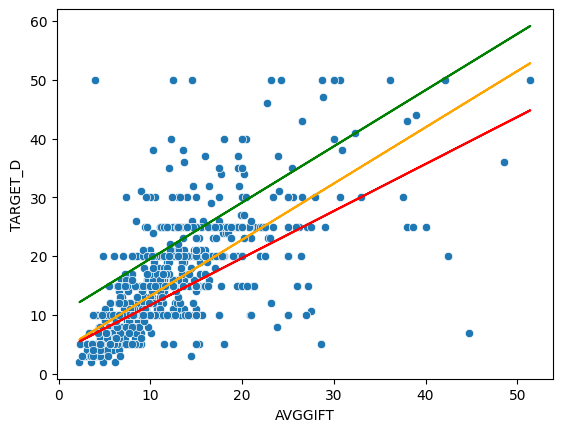

In [49]:
#any other line would have a worst result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT'] # lm.predict(X)
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
# another slope
regression_line_2 = lm.intercept_ + 0.8*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_2, c = 'red')
# another intercept
regression_line_3 = 10 + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_3, c = 'green')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [50]:
print("MSE fitted line is ", round(mean_squared_error(regression_line, y),2))
print("MSE line 2 is      ", round(mean_squared_error(regression_line_2, y),2))
print("MSE line 3 is      ", round(mean_squared_error(regression_line_3, y),2))

MSE fitted line is  37.6
MSE line 2 is       42.09
MSE line 3 is       77.63


In [51]:
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [52]:
#let's bring in more variables
y = reg_data['TARGET_D']
X_new = reg_data.drop(['TARGET_D'], axis=1) # x2 -> col2, x3 -> col3
lm2 = LinearRegression()
lm2.fit(X_new,y)
print(lm2.score(X_new,y))
y_pred2 = lm2.predict(X_new)
print(mean_squared_error(y_pred2,y))
#results are better, but now we cannot visualize them

0.5640186699298624
34.182077462990065


In [53]:
X_new.head() # y_pred = TARGET_D = b0 + b1 * HV1 + b2 * IC1 + b3 * IC2 + ....

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2000.0,458,453,495,469.0,19217,13.511111
1,817.0,213,256,240,236.0,8518,12.222222
2,1866.0,405,423,394,407.0,15709,23.857143
3,1174.0,268,282,298,283.0,10427,10.400000
4,3048.0,470,557,562,530.0,31631,8.222222


In [54]:
X_new.describe()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1600.019000,348.366000,395.848000,395.767000,379.984000,16177.241000,11.828555
std,1110.065447,167.285183,184.705254,165.794211,170.241252,9641.700538,6.685000
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870
25%,921.000000,237.000000,278.000000,281.000000,267.000000,10834.500000,7.000000
50%,1246.500000,321.000000,365.000000,368.000000,352.500000,14000.000000,10.333333
75%,1870.000000,416.250000,469.000000,468.000000,449.750000,18639.000000,15.000000
max,7077.000000,1500.000000,1500.000000,1311.000000,1437.000000,100528.000000,51.428571


In [55]:
lm2.coef_ # b1, b2, b3,....

array([ 2.59524877e-03, -1.02519484e-01, -9.54071068e-02, -9.46876520e-02,
        2.89332425e-01, -1.26561451e-04,  8.56301222e-01])

In [56]:
lm2.intercept_ # b0 

3.7604323600782497

$$TARGET_D = 3.76 + 2.59524877e-03 * HV1  -1.02519484e-01 * IC1  -9.54071068e-02 * IC2 +....$$


In [58]:
one = [1,2,3]
two = ["a","b","c"]

list(zip(one, two))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [59]:
list(zip(list(X_new.columns),list(lm2.coef_)))

[('HV1', 0.002595248765429574),
 ('IC1', -0.1025194838519868),
 ('IC2', -0.09540710676034883),
 ('IC3', -0.09468765195202204),
 ('IC4', 0.28933242489172145),
 ('IC5', -0.0001265614506604229),
 ('AVGGIFT', 0.8563012219304742)]

In [60]:
lm2.intercept_

3.7604323600782497

In [61]:
# TARGET_D = b_0 + b_1 * HV1 + b_2 * IC1 + b_3 * IC3 + b_4 * IC4 + b_5 * IC5 + b_6 * AVGGIFT
# TARGET_D = lm2.intercept_ + lm2.coef_[0] * HV1 + lm2.coef_[1] * IC1 + lm2.coef_[2] * IC3 + lm2.coef_[3] * IC4 + lm2.coef_[4] * IC5 + lm2.coef_[4] * AVGGIFT

print(lm2.intercept_) # b_0
print(lm2.coef_)

3.7604323600782497
[ 2.59524877e-03 -1.02519484e-01 -9.54071068e-02 -9.46876520e-02
  2.89332425e-01 -1.26561451e-04  8.56301222e-01]


# Checking assumptions

In [62]:
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

In [63]:
correlations_matrix = reg_data.corr()
correlations_matrix

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
HV1,1.000000,0.691005,0.723544,0.720057,0.721741,0.732514,0.316638,0.388852
IC1,0.691005,1.000000,0.948398,0.978535,0.988167,0.786123,0.139461,0.144340
IC2,0.723544,0.948398,1.000000,0.952995,0.981665,0.877055,0.154315,0.158349
IC3,0.720057,0.978535,0.952995,1.000000,0.989796,0.818425,0.147167,0.157744
IC4,0.721741,0.988167,0.981665,0.989796,1.000000,0.840399,0.149259,0.155759
IC5,0.732514,0.786123,0.877055,0.818425,0.840399,1.000000,0.144684,0.149836
AVGGIFT,0.316638,0.139461,0.154315,0.147167,0.149259,0.144684,1.000000,0.721364
TARGET_D,0.388852,0.144340,0.158349,0.157744,0.155759,0.149836,0.721364,1.000000


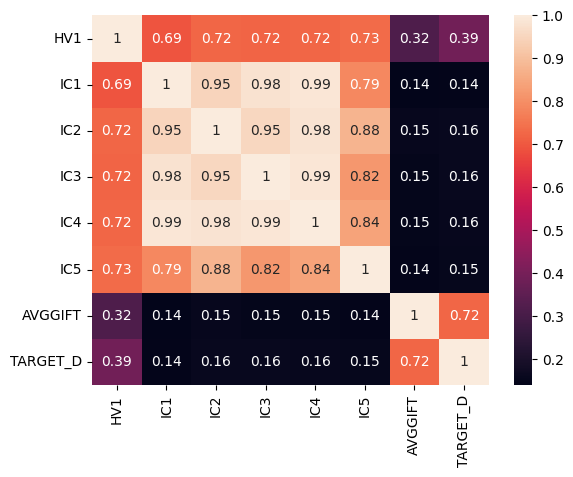

In [66]:
correlations_matrix = reg_data.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [ ]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC2, IC3 and IC4

In [67]:
reduced_data = reg_data.drop(['IC2', 'IC3','IC4'],axis=1)
reduced_data.columns

Index(['HV1', 'IC1', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

In [68]:
#from sklearn import linear_model
y = reduced_data['TARGET_D']
X_new3 = reduced_data.drop(['TARGET_D'], axis=1)
lm3 = LinearRegression()
lm3.fit(X_new3,y)
print(lm3.score(X_new3,y))
y_pred3 =lm3.predict(X_new3)
print(mean_squared_error(y_pred3,y))

0.5638520209627318
34.19514317821843


In [69]:
type(y_pred3)

numpy.ndarray

In [70]:
list(zip(list(X_new3.columns),list(lm3.coef_)))

[('HV1', 0.002605304810085751),
 ('IC1', -0.003835565829242696),
 ('IC5', -0.00011565206846273412),
 ('AVGGIFT', 0.8564866939832755)]

In [71]:
employees = pd.DataFrame({'Age':[34,25,78],'Salary':[20000,40000,37000]})
display(employees)
employees.iloc[0] - employees.iloc[1]

,Age,Salary
0,34,20000
1,25,40000
2,78,37000


Age           9
Salary   -20000
dtype: int64

In [72]:
list(zip([1,2,3],['a','b','c'],['A','B','C']))

[(1, 'a', 'A'), (2, 'b', 'B'), (3, 'c', 'C')]

In [73]:
def create_linear_model(X,y):
    # Docstring
    '''
    This function creates a linear model using X to predict y

    Inputs:
      X -> pd.DataFrame
      y -> pd.Series

    Outputs:
      lm -> scikit_learn linear model
      r2 -> the r2 of the model (float)
      mse -> mse of the model (float)
    '''

    lm = LinearRegression()
    lm.fit(X,y)
    print("The intercept of the model is: ",lm.intercept_)
    print("The coeficients of the model are: ",lm.coef_)
    y_pred = lm.predict(X)
    r2 = lm.score(X,y)
    mse = mean_squared_error(y_pred,y)
    print("The r2 of the model is: {:.3f}".format(r2))
    print("The MSE of the model is: {:.2f}".format(mse))
    c = list(zip(list(X.columns),list(lm.coef_))) 
    print(c)   

    return lm, r2, mse

In [74]:
my_model, my_model_r2, my_model_mse = create_linear_model(reduced_data.drop(['TARGET_D'], axis=1),reduced_data['TARGET_D'])

The intercept of the model is:  3.8882749333883027
The coeficients of the model are:  [ 2.60530481e-03 -3.83556583e-03 -1.15652068e-04  8.56486694e-01]
The r2 of the model is: 0.564
The MSE of the model is: 34.20
[('HV1', 0.002605304810085751), ('IC1', -0.003835565829242696), ('IC5', -0.00011565206846273412), ('AVGGIFT', 0.8564866939832755)]


In [75]:
my_model.coef_

array([ 2.60530481e-03, -3.83556583e-03, -1.15652068e-04,  8.56486694e-01])